465 Homework 4–Due 10/30/20@ 12:00pm (Noon) Jeremy Hook

In [162]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np                    # for scientific functions - mostly numerical
from matplotlib import pyplot as plt  # for plotting
from scipy.optimize import leastsq    # the function to carry out leastsquare optimization

PROBLEM # 1

1)You are living in a tropical paradise. Food is plentiful. The sun is shining. People no longer feel ashamed about their Nickelback CD collections. Humanity has evolved. You are now free to engineerwhatever you desire. Your next experimentis on determining the reaction order of a reaction for the synthesis of chemical X, which can be used to catalyze the formation of artificial chocolate(cacao). You take a container labeled “reagents”off the shelf and pour it into  an  isothermal,  isobaric  batch  reactor  and  monitor  the  concentration  over  time. 
You suspect the reaction has the chemical equation A --> X and is irreversible.

time(min)012345678910

CA(mol/L)1.3370.8130.5710.4380.3630.3040.2670.2290.2070.1910.173


In [163]:
time = np.array([0,1,2,3,4,5,6,7,8,9,10]) #Minutes
C_A = np.array([1.337,0.813,0.571,0.438,0.363,0.304,0.267,0.229,0.207,0.191,0.173]) #mol/L

a.Using the Integral Method, find the order of the reaction. Create a plotin Python with the  kinetic  data  and  your  fitted  line  with  the  appropriate  axes  for  the  order  of  the reaction. Be sure to label the axes (with units, if applicable) and give it a legend.

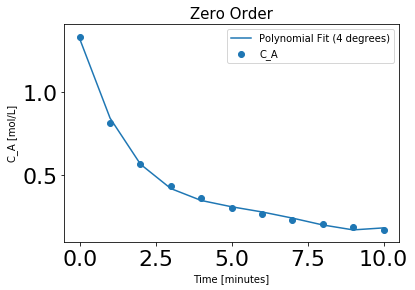

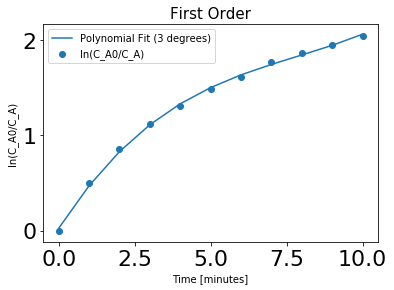

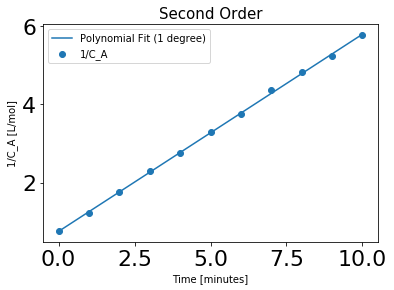

In [164]:
fig = plt.figure()
#Guess 1: zero order

plt.scatter(time, C_A, label ="C_A")
m0, b0, c0, d0, e0 = np.polyfit(time, C_A, 4) #Best-fitted line
plt.plot(time, m0*time**4+b0*time**3+c0*time**2+d0*time+e0 ,label ="Polynomial Fit (4 degrees)")
plt.title("Zero Order",size = '15') 
plt.xlabel("Time [minutes]",size = '10') 
plt.ylabel("C_A [mol/L]",size = '10') 

plt.legend(prop={"size":10})

#Guess 2: first order
plt.figure()
ln = np.log(C_A[0]/C_A)
plt.scatter(time, ln, label ="ln(C_A0/C_A)")
m1, b1, c1, d1 = np.polyfit(time, ln, 3) #Best-fitted line
plt.plot(time, m1*time**3+b1*time**2+c1*time+d1, label ="Polynomial Fit (3 degrees)")
plt.title("First Order",size = '15') 
plt.xlabel("Time [minutes]",size = '10') 
plt.ylabel("ln(C_A0/C_A)",size = '10') 
plt.legend(prop={"size":10})

#Guess 3: second order
plt.figure()
inv = (1/C_A)
plt.scatter(time, inv, label ="1/C_A")
m2, b2 = np.polyfit(time, inv, 1) #Best-fitted line
plt.plot(time, m2*time+b2, label ="Polynomial Fit (1 degree)")
plt.title("Second Order",size = '15') 
plt.xlabel("Time [minutes]",size = '10') 
plt.ylabel("1/C_A [L/mol]",size = '10')
plt.legend(prop={"size":10})


Due to the linear fit of the data to our "Second Order" plot we can see that the order of the reaction is 2



b.From your fit in part a, what is the reaction rate constant for this process?

In [165]:
#We can see from part a that this is a second order process, because it has a linear fit which is 1/C_A = 1/C_A0 + kt
k = m2 # The slope of this linear fit will be out k value 
print('Reaction rate constant (k)= {:.5f} [L /(mol)(min)]'.format(k))

Reaction rate constant (k)= 0.50528 [L /(mol)(min)]


c.After reading the container of “reagents”more carefully,you realize that the chemical equation for the reaction was actually 2A + B --> X all alongand the reaction follows an  elementary  rate  law. It  also  says  that  the  reaction  rate  constant  is  0.02  L2mol-2min-1.  Given  this  new  information,  what  was  the  concentration  of  B  if  it  was  held constant when the tabulated data was gathered.

In [166]:
#Reaction: 2A + B --> X, k = .02 [L^2/(mol^2*min)]
#The reaction follows an  elementary  rate  law = -r_A = -dC_A/dt = k*C_A^2*C_B
k = 0.02  # [L^2/(mol^2*min)]

C_B = ((-1/C_A[10])-(-1/C_A[0]))/(-k*(time[10]-time[0])) #To find concentration of C_B rearrange equation above and solve the differential to to solve for C_B
print('If C_B was held constant C_B = {:.5f} [mol/L]'.format(C_B))

If C_B was held constant C_B = 25.16202 [mol/L]


PROBLEM # 2

2)Kinetic rate data (which can be found on Canvas) is given for a chemical reaction A --> B, but the order of the reaction is not known. The reaction occurred in an isothermal, isobaric batch reactor. The units of the concentration data are in mol/L and time is in minutes.

In [172]:
cA = np.array([9.871507338462981451e+00,7.043182012988722818e+00,5.746924614667721087e+00,4.971537585096347023e+00,4.457849128909017189e+00,4.064960286332921946e+00,3.772592721342783229e+00,3.514160649290875238e+00,3.319845008145748011e+00,3.160456588877444517e+00,3.009833424250920597e+00,2.879221218135621374e+00,2.772167910991736317e+00,2.663273581787786171e+00,2.578182658197410326e+00,2.493854311651262368e+00,2.419711253693596298e+00,2.354660875889686533e+00,2.291649331325676275e+00,2.232809013822000477e+00,2.178239995714944754e+00,2.131097725638296136e+00]) #mol/L

In [173]:
t = np.array([0.00000000000000000e+00,5.000000000000000000e-01,1.000000000000000000e+00,1.500000000000000000e+00,2.000000000000000000e+00,2.500000000000000000e+00,3.000000000000000000e+00,3.500000000000000000e+00,4.000000000000000000e+00,4.500000000000000000e+00,5.000000000000000000e+00,5.500000000000000000e+00,6.000000000000000000e+00,6.500000000000000000e+00,7.000000000000000000e+00,7.500000000000000000e+00,8.000000000000000000e+00,8.500000000000000000e+00,9.000000000000000000e+00,9.500000000000000000e+00,1.000000000000000000e+01,1.050000000000000000e+01]) #Minutes

  a.Use the Differential Method to determine the order of the reaction given the kinetic rate  data.  You  may  round  to  the  nearest integer.  It  would  be  best  to  perform  these calculations in Python (np.diff()is very helpful here).

In [174]:
#Differential Method ln(-dCA/dt) = ln(kA) + alpha * ln(CA)
#plot ln(-dCA/dt) vs ln(CA)

ln_CA = np.log(cA)
diff_CA = np.diff(cA)
diff_time = np.diff(t)

delta_time = diff_time[0]
natlog_derivative = np.double(np.arange(0,22))
natlog_derivative[0] = np.double(np.log(-((-3)*cA[0] +4*cA[1] - cA[2])/(2*delta_time)))
natlog_derivative[21] = np.double(np.log(-((3)*cA[21] -4*cA[20] + cA[19])/(2*delta_time)))

for i in range(1,21):
    natlog_derivative[i] = np.double(np.log(-(cA[i+1]-cA[i-1])))

#From the data we have created we could fit a polynomial line to the data, and whatever the slope of this polynomial line is will be our alpha value which will be the Order of the reaction
m, b = np.polyfit(ln_CA, natlog_derivative, 1) #Polynomial fit line
alpha = m #The slope of our polynomial fit line

print('The Order of Reaction (alpha) = {:.0f}'.format(alpha))

The Order of Reaction (alpha) = 3


  b.Calculate the rate constant of the reaction as well with the proper units.


In [175]:
#Equation 7-11 from FOLDGER BOOK
#because k is a constant rate change we only need to choose a point from the concentration A and then find the derivative

k = np.exp((m*ln_CA[10]+b)/(alpha*ln_CA[10]))
print('Rate constant (k) =  {:.5f} [L^2/(mol^2)(min)]'.format(k))

Rate constant (k) =  0.67378 [L^2/(mol^2)(min)]


  c.Include the plot of your fitted line and of the provided data with appropriately labeled axes.

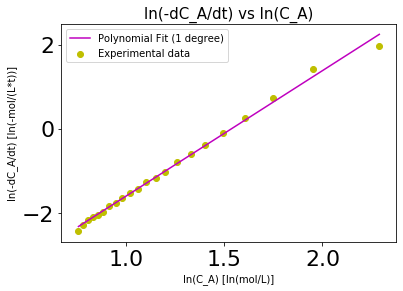

In [176]:
#Plot Differential Method Using the information that we got in part A of this problem

plt.scatter(ln_CA, natlog_derivative, label ='Experimental data', color = 'y')
plt.plot(ln_CA, m*ln_CA+b,color = 'm', label ="Polynomial Fit (1 degree)")
plt.title("ln(-dC_A/dt) vs ln(C_A)",size = 15) 
plt.xlabel("ln(C_A) [ln(mol/L)]",size = 10) 
plt.ylabel("ln(-dC_A/dt) [ln(-mol/(L*t))]",size = 10) 
plt.legend(prop={"size":10})
